In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/economics-fraud-detection-financial-inclusion/sample_submission.csv
/kaggle/input/economics-fraud-detection-financial-inclusion/bureau_balance.csv
/kaggle/input/economics-fraud-detection-financial-inclusion/POS_CASH_balance.csv
/kaggle/input/economics-fraud-detection-financial-inclusion/application_train.csv
/kaggle/input/economics-fraud-detection-financial-inclusion/HomeCredit_columns_description.csv
/kaggle/input/economics-fraud-detection-financial-inclusion/application_test.csv
/kaggle/input/economics-fraud-detection-financial-inclusion/previous_application.csv
/kaggle/input/economics-fraud-detection-financial-inclusion/credit_card_balance.csv
/kaggle/input/economics-fraud-detection-financial-inclusion/installments_payments.csv
/kaggle/input/economics-fraud-detection-financial-inclusion/bureau.csv


# Phase 1 EDA for Home Credit application_train.csv
# Requirements: pandas, numpy, matplotlib, seaborn

In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os, gc

In [3]:

sns.set(style='whitegrid')
plt.rcParams['figure.dpi'] = 120
os.makedirs("/kaggle/working/eda_outputs", exist_ok=True)

# 1. LOAD DATA

In [4]:
BASE = "/kaggle/input/economics-fraud-detection-financial-inclusion/"
app = pd.read_csv(BASE + "application_train.csv")

print(f"✅ Loaded application_train.csv with {app.shape[0]:,} rows and {app.shape[1]:,} columns")


✅ Loaded application_train.csv with 307,511 rows and 122 columns


# ---------- 2. TARGET VARIABLE ----------


TARGET Distribution:
         Count  Percent
TARGET                 
0       282686    91.93
1        24825     8.07


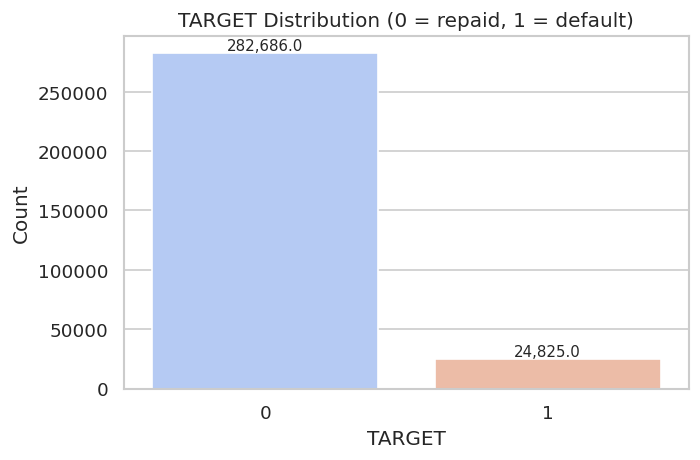

In [5]:

target_counts = app["TARGET"].value_counts().sort_index()
target_pct = (target_counts / target_counts.sum() * 100).round(2)
print("\nTARGET Distribution:")
print(pd.DataFrame({"Count": target_counts, "Percent": target_pct}))
plt.figure(figsize=(6, 4))
sns.countplot(x="TARGET", data=app, palette="coolwarm")
plt.title("TARGET Distribution (0 = repaid, 1 = default)")
plt.xlabel("TARGET")
plt.ylabel("Count")
for p in plt.gca().patches:
    plt.gca().annotate(f"{p.get_height():,}", (p.get_x()+p.get_width()/2., p.get_height()),
                       ha="center", va="bottom", fontsize=9)
plt.tight_layout()
plt.savefig("/kaggle/working/eda_outputs/target_distribution.png")
plt.show()


# ---------- 3. UNIVARIATE DEMOGRAPHIC ANALYSIS ----------

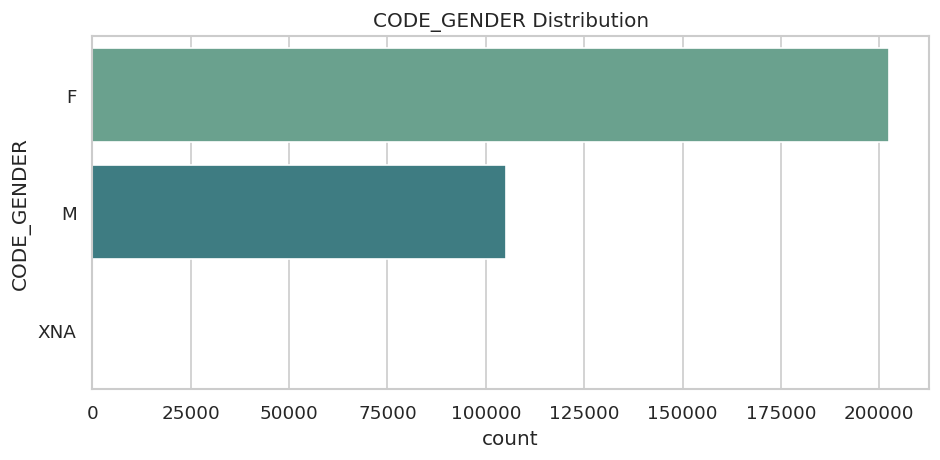

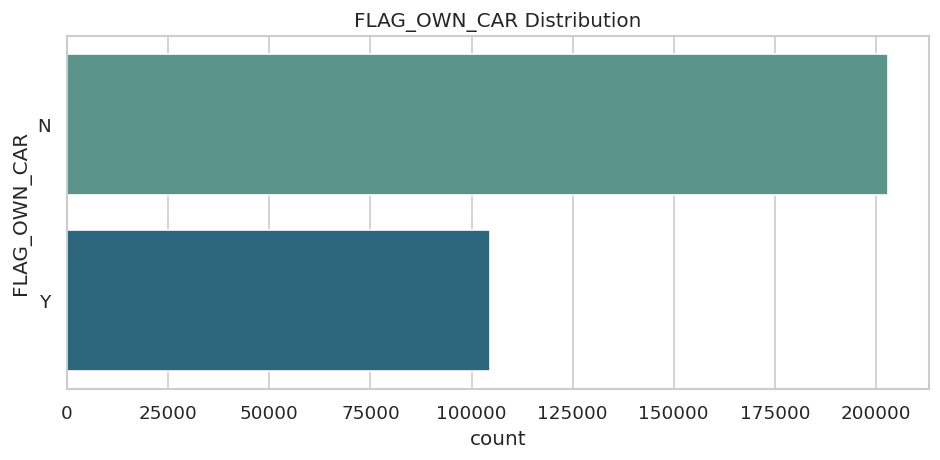

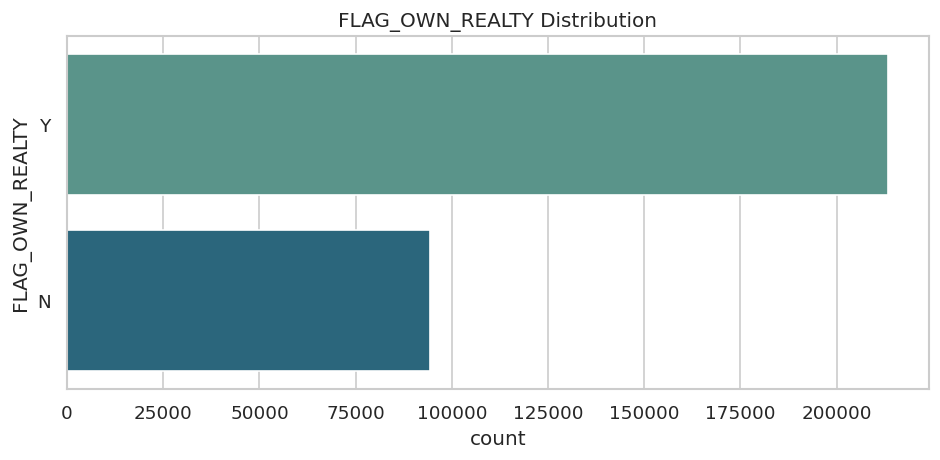

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


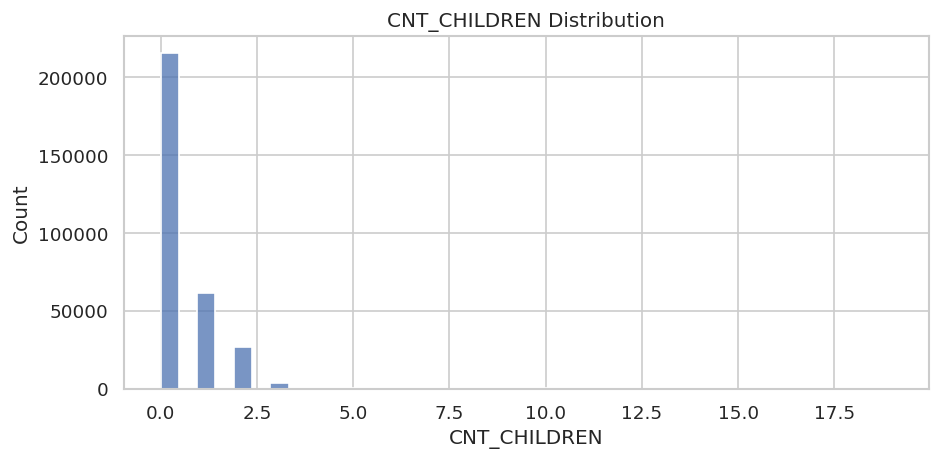

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


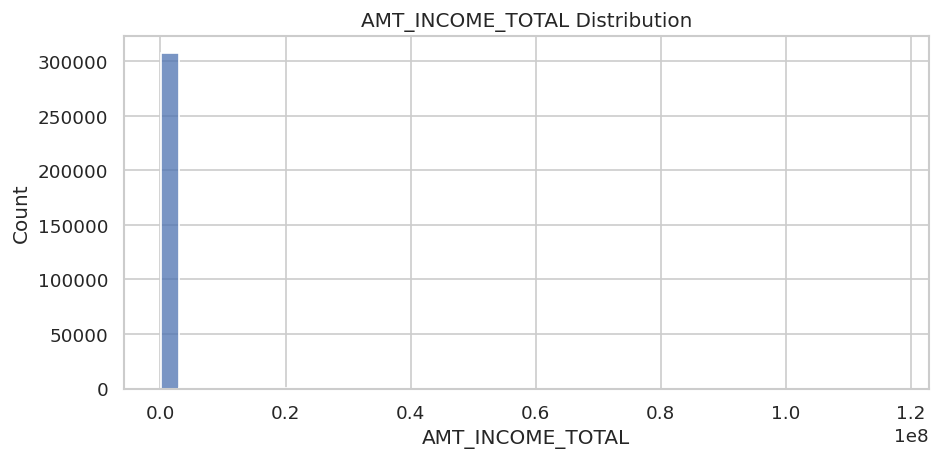

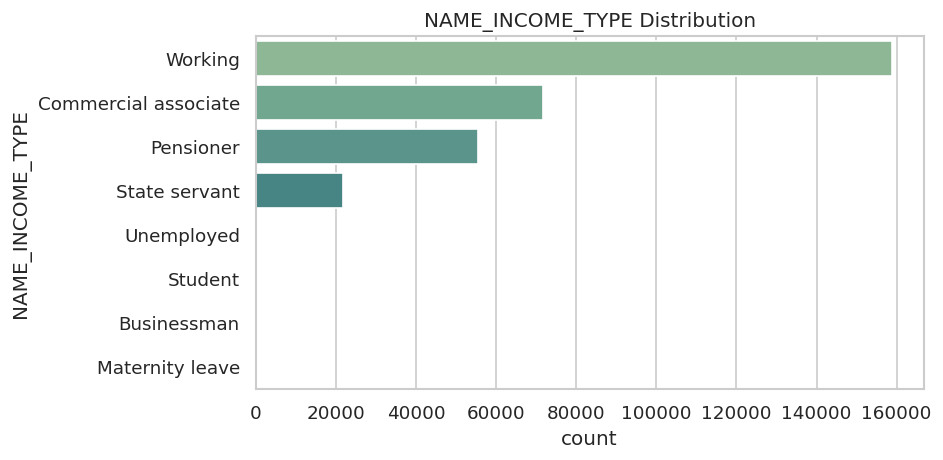

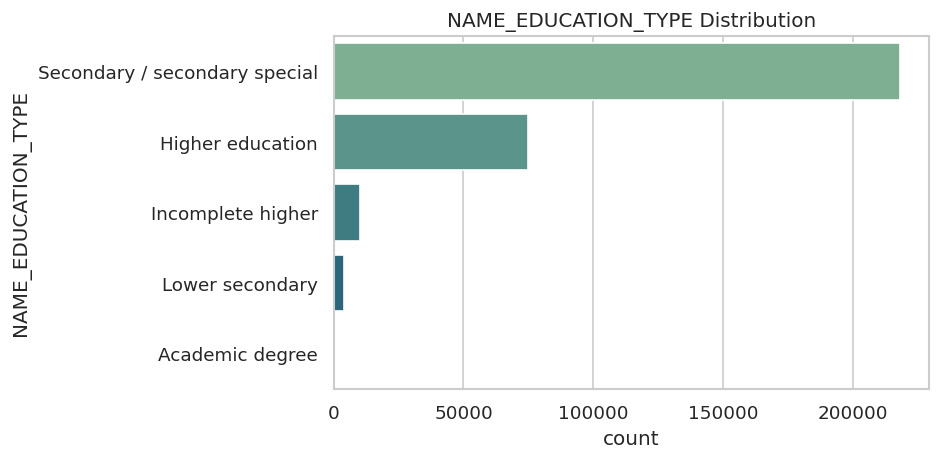

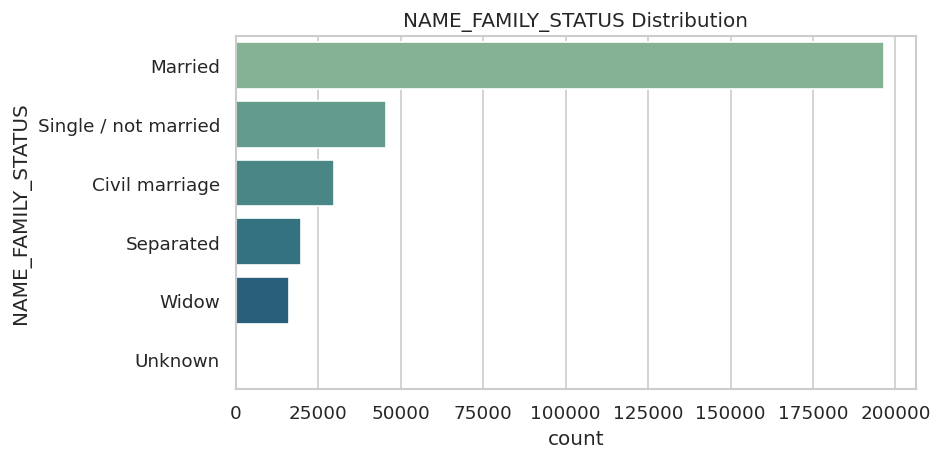

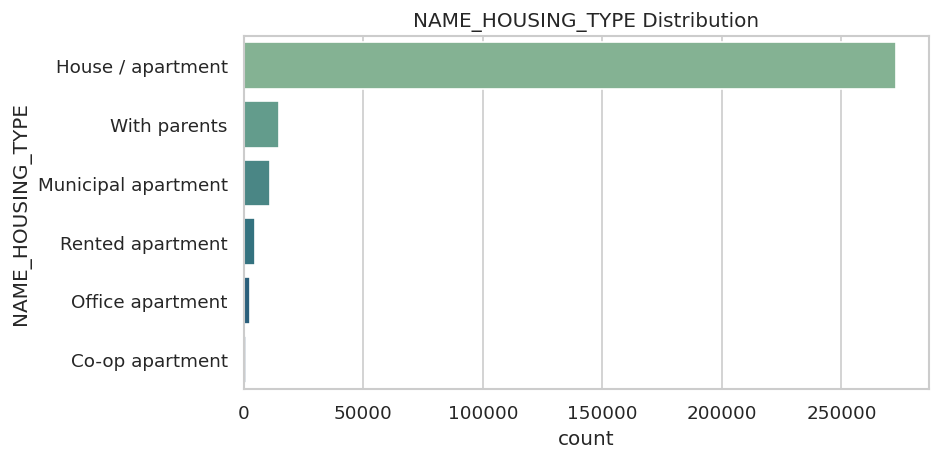

In [6]:
demo_cols = [
    "CODE_GENDER",
    "FLAG_OWN_CAR",
    "FLAG_OWN_REALTY",
    "CNT_CHILDREN",
    "AMT_INCOME_TOTAL",
    "NAME_INCOME_TYPE",
    "NAME_EDUCATION_TYPE",
    "NAME_FAMILY_STATUS",
    "NAME_HOUSING_TYPE"
]

for col in demo_cols:
    plt.figure(figsize=(8, 4))
    if app[col].dtype == "object":
        order = app[col].value_counts().index
        sns.countplot(data=app, y=col, order=order, palette="crest")
        plt.title(f"{col} Distribution")
    else:
        sns.histplot(app[col].dropna(), bins=40, kde=False)
        plt.title(f"{col} Distribution")
    plt.tight_layout()
    plt.savefig(f"/kaggle/working/eda_outputs/univariate_{col}.png")
    plt.show()

# Log income plot


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


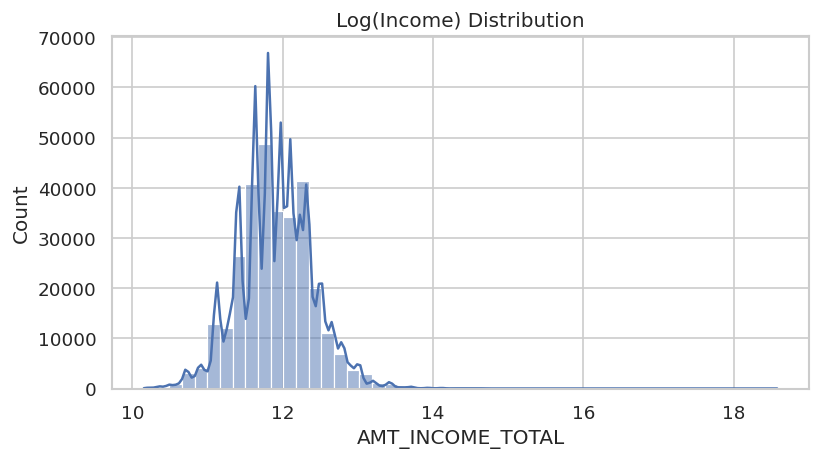

In [7]:
plt.figure(figsize=(7,4))
sns.histplot(np.log1p(app["AMT_INCOME_TOTAL"]), bins=50, kde=True)
plt.title("Log(Income) Distribution")
plt.tight_layout()
plt.savefig("/kaggle/working/eda_outputs/log_income_distribution.png")
plt.show()



# ---------- 4. BIVARIATE ANALYSIS ----------

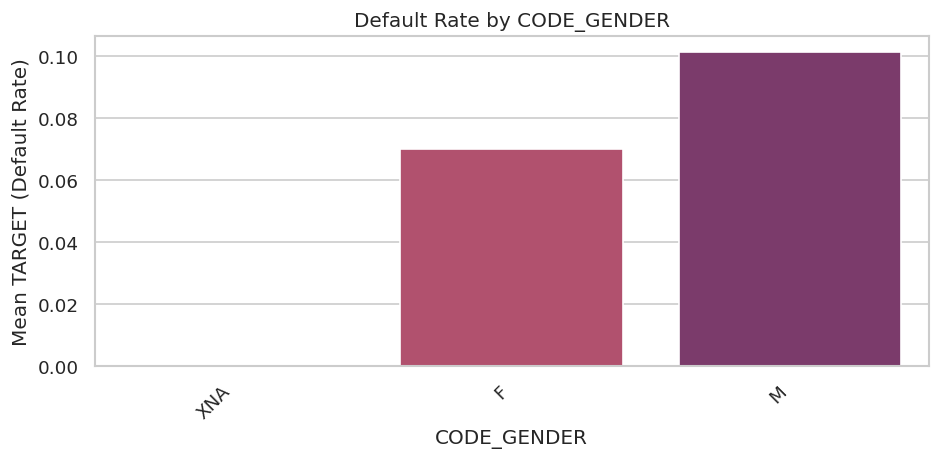


Default rate by CODE_GENDER:
   CODE_GENDER    TARGET
2         XNA  0.000000
0           F  0.069993
1           M  0.101419


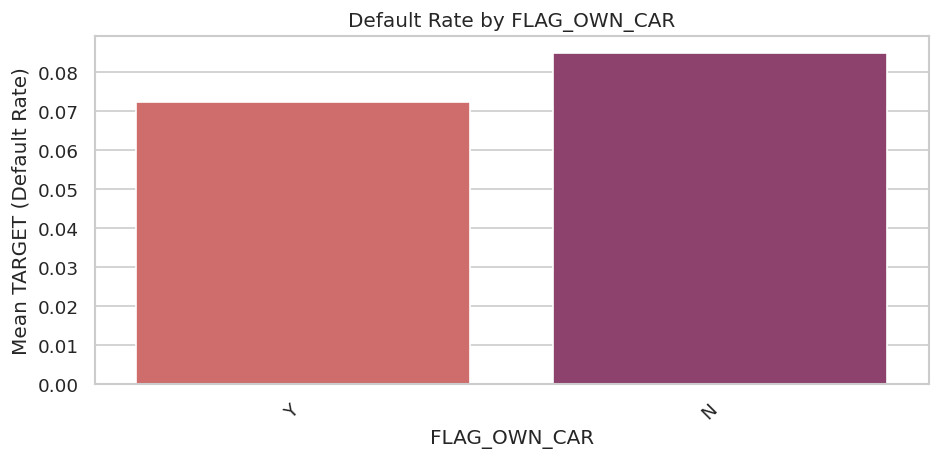


Default rate by FLAG_OWN_CAR:
   FLAG_OWN_CAR    TARGET
1            Y  0.072437
0            N  0.085002


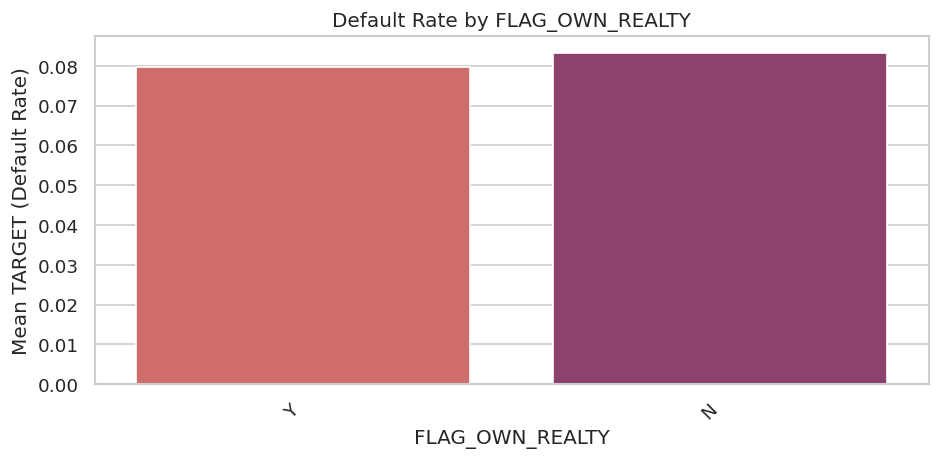


Default rate by FLAG_OWN_REALTY:
   FLAG_OWN_REALTY    TARGET
1               Y  0.079616
0               N  0.083249


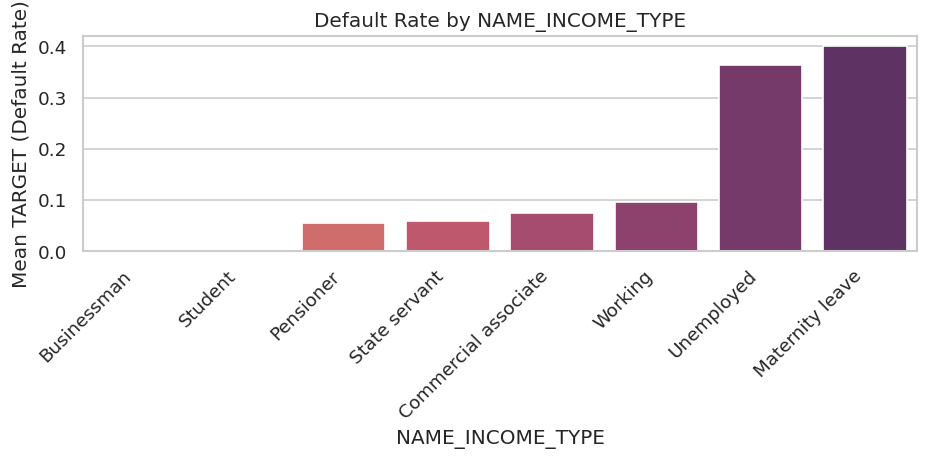


Default rate by NAME_INCOME_TYPE:
        NAME_INCOME_TYPE    TARGET
0           Businessman  0.000000
5               Student  0.000000
3             Pensioner  0.053864
4         State servant  0.057550
1  Commercial associate  0.074843
7               Working  0.095885
6            Unemployed  0.363636
2       Maternity leave  0.400000


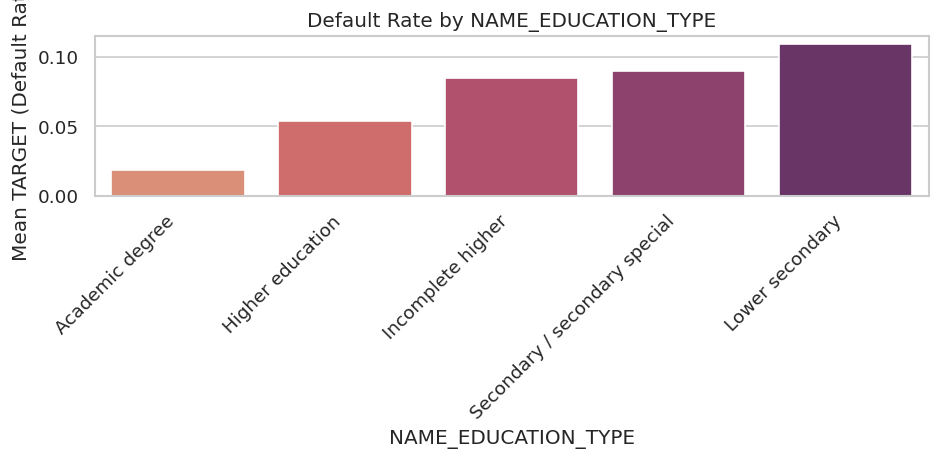


Default rate by NAME_EDUCATION_TYPE:
              NAME_EDUCATION_TYPE    TARGET
0                Academic degree  0.018293
1               Higher education  0.053551
2              Incomplete higher  0.084850
4  Secondary / secondary special  0.089399
3                Lower secondary  0.109277


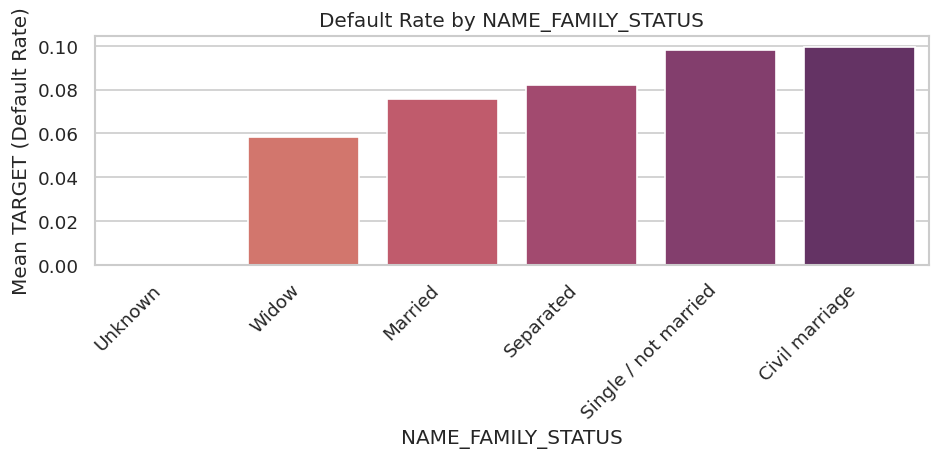


Default rate by NAME_FAMILY_STATUS:
      NAME_FAMILY_STATUS    TARGET
4               Unknown  0.000000
5                 Widow  0.058242
1               Married  0.075599
2             Separated  0.081942
3  Single / not married  0.098077
0        Civil marriage  0.099446


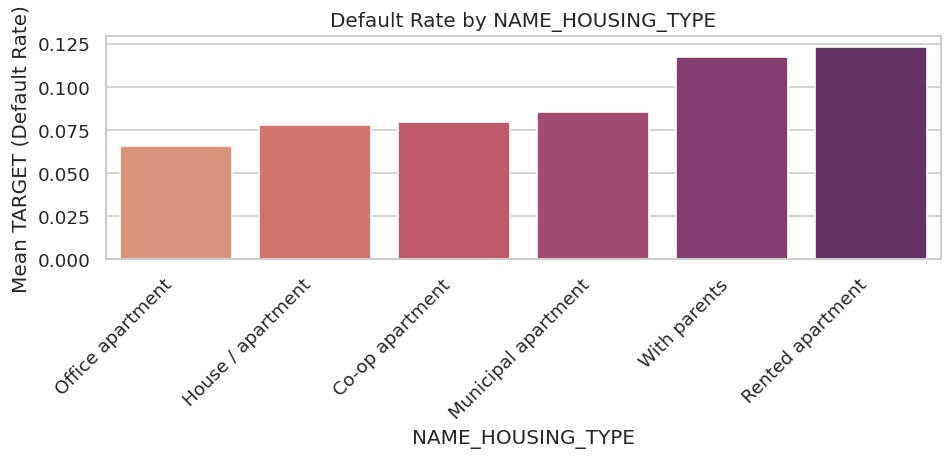


Default rate by NAME_HOUSING_TYPE:
      NAME_HOUSING_TYPE    TARGET
3     Office apartment  0.065724
1    House / apartment  0.077957
0      Co-op apartment  0.079323
2  Municipal apartment  0.085397
5         With parents  0.116981
4     Rented apartment  0.123131


In [8]:
def default_rate(df, col):
    tmp = df.groupby(col)["TARGET"].mean().reset_index().sort_values("TARGET")
    plt.figure(figsize=(8,4))
    sns.barplot(data=tmp, x=col, y="TARGET", palette="flare")
    plt.title(f"Default Rate by {col}")
    plt.ylabel("Mean TARGET (Default Rate)")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.savefig(f"/kaggle/working/eda_outputs/default_rate_{col}.png")
    plt.show()
    return tmp

bivars = ["CODE_GENDER", "FLAG_OWN_CAR", "FLAG_OWN_REALTY",
          "NAME_INCOME_TYPE", "NAME_EDUCATION_TYPE",
          "NAME_FAMILY_STATUS", "NAME_HOUSING_TYPE"]

bivariate_tables = {}
for col in bivars:
    bivariate_tables[col] = default_rate(app, col)
    print(f"\nDefault rate by {col}:\n", bivariate_tables[col])

# Income vs TARGET (boxplot)

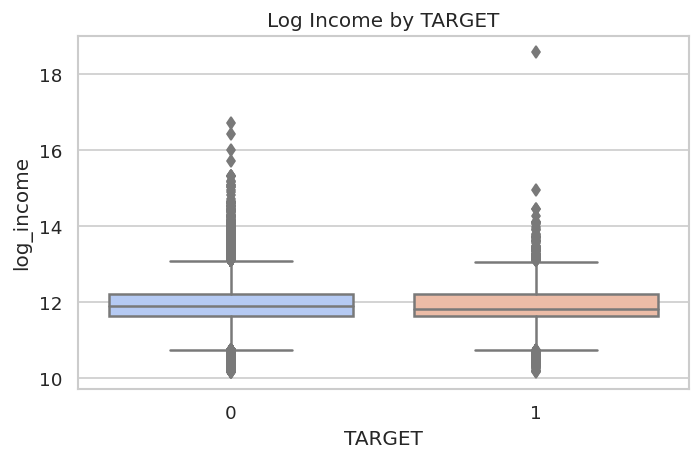

In [9]:
app["log_income"] = np.log1p(app["AMT_INCOME_TOTAL"])
plt.figure(figsize=(6,4))
sns.boxplot(x="TARGET", y="log_income", data=app, palette="coolwarm")
plt.title("Log Income by TARGET")
plt.tight_layout()
plt.savefig("/kaggle/working/eda_outputs/income_boxplot.png")
plt.show()

# ---------- 5. CORRELATION HEATMAP ----------


Top 30 numeric features by absolute correlation with TARGET:
EXT_SOURCE_3                   0.178919
EXT_SOURCE_2                   0.160472
EXT_SOURCE_1                   0.155317
DAYS_BIRTH                     0.078239
REGION_RATING_CLIENT_W_CITY    0.060893
REGION_RATING_CLIENT           0.058899
DAYS_LAST_PHONE_CHANGE         0.055218
DAYS_ID_PUBLISH                0.051457
REG_CITY_NOT_WORK_CITY         0.050994
FLAG_EMP_PHONE                 0.045982
DAYS_EMPLOYED                  0.044932
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_DOCUMENT_3                0.044346
FLOORSMAX_AVG                  0.044003
FLOORSMAX_MEDI                 0.043768
FLOORSMAX_MODE                 0.043226
DAYS_REGISTRATION              0.041975
AMT_GOODS_PRICE                0.039645
OWN_CAR_AGE                    0.037612
REGION_POPULATION_RELATIVE     0.037227
ELEVATORS_AVG                  0.034199
ELEVATORS_MEDI                 0.033863
FLOORSMIN_AVG                  0.033614
FLOORSMIN_MEDI    

/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


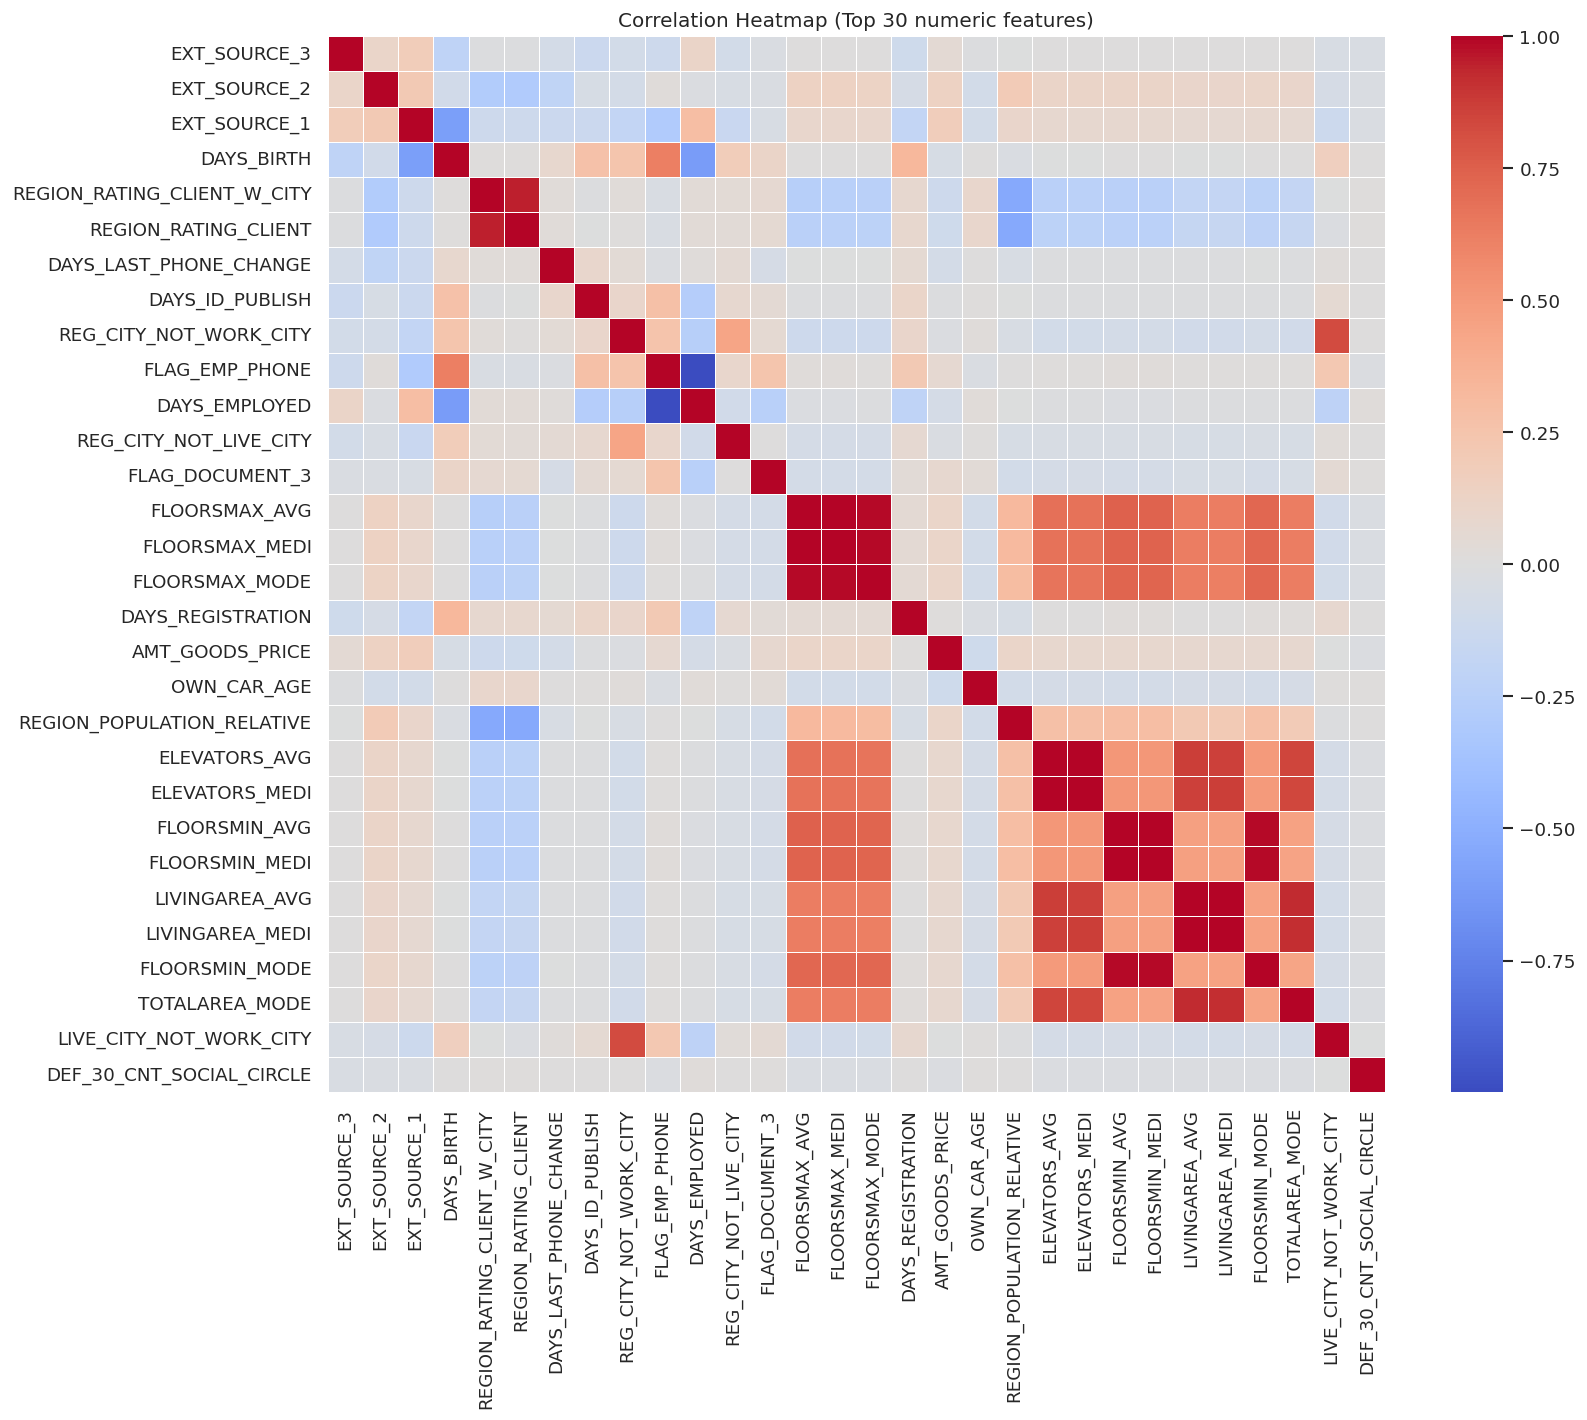

In [10]:
numeric = app.select_dtypes(include=[np.number])
numeric_cols = [c for c in numeric.columns if c not in ["SK_ID_CURR","TARGET"]]
corr_with_target = numeric[numeric_cols].corrwith(app["TARGET"]).abs().sort_values(ascending=False)
top30 = corr_with_target.head(30).index.tolist()

print("\nTop 30 numeric features by absolute correlation with TARGET:")
print(corr_with_target.head(30))

corr_matrix = numeric[top30].corr()

plt.figure(figsize=(14,12))
sns.heatmap(corr_matrix, cmap="coolwarm", center=0, linewidths=0.3)
plt.title("Correlation Heatmap (Top 30 numeric features)")
plt.tight_layout()
plt.savefig("/kaggle/working/eda_outputs/corr_heatmap_top30.png")
plt.show()

In [11]:

# ---------- 6. CLEANUP ----------
del numeric, corr_matrix
gc.collect()

print("\n✅ Phase 1 EDA complete. All plots saved to /kaggle/working/eda_outputs/")


✅ Phase 1 EDA complete. All plots saved to /kaggle/working/eda_outputs/


# Phase 2  FEATURE ENGINEERING

In [12]:
import pandas as pd, numpy as np, gc, os

BASE = "/kaggle/input/economics-fraud-detection-financial-inclusion/"
print("Loading datasets...")

app_train = pd.read_csv(BASE + "application_train.csv")
app_test  = pd.read_csv(BASE + "application_test.csv")
bureau    = pd.read_csv(BASE + "bureau.csv")
bb        = pd.read_csv(BASE + "bureau_balance.csv")
prev      = pd.read_csv(BASE + "previous_application.csv")
pos       = pd.read_csv(BASE + "POS_CASH_balance.csv")
inst      = pd.read_csv(BASE + "installments_payments.csv")
cc        = pd.read_csv(BASE + "credit_card_balance.csv")

print("Datasets loaded.")



Loading datasets...
Datasets loaded.


# 1. Bureau + Bureau Balance

In [13]:
print("Aggregating Bureau + Bureau Balance...")

bb_agg = bb.groupby("SK_ID_BUREAU").agg(
    MONTHS_BALANCE_MEAN=('MONTHS_BALANCE', 'mean'),
    MONTHS_BALANCE_MAX=('MONTHS_BALANCE', 'max'),
    STATUS_COUNT=('STATUS', 'count')
).reset_index()

bureau = bureau.merge(bb_agg, on="SK_ID_BUREAU", how="left")

bureau_agg = bureau.groupby("SK_ID_CURR").agg(
    BUREAU_COUNT=('SK_ID_BUREAU', 'count'),
    ACTIVE_LOANS=('CREDIT_ACTIVE', lambda x: (x=="Active").sum()),
    CLOSED_LOANS=('CREDIT_ACTIVE', lambda x: (x=="Closed").sum()),
    AVG_DAYS_CREDIT=('DAYS_CREDIT', 'mean'),
    AVG_CREDIT_DAY_OVERDUE=('CREDIT_DAY_OVERDUE', 'mean'),
    MAX_OVERDUE=('AMT_CREDIT_MAX_OVERDUE', 'max'),
    AVG_CREDIT_SUM=('AMT_CREDIT_SUM', 'mean'),
    AVG_CREDIT_SUM_DEBT=('AMT_CREDIT_SUM_DEBT', 'mean'),
    AVG_CREDIT_SUM_LIMIT=('AMT_CREDIT_SUM_LIMIT', 'mean'),
    MONTHS_BAL_MEAN=('MONTHS_BALANCE_MEAN', 'mean')
).reset_index()

del bureau, bb, bb_agg; gc.collect()

Aggregating Bureau + Bureau Balance...


0

# 2. Previous Applications

In [14]:
print("Aggregating Previous Applications...")

prev_agg = prev.groupby("SK_ID_CURR").agg(
    PREV_COUNT=('SK_ID_PREV', 'count'),
    AVG_PREV_AMT_APP=('AMT_APPLICATION', 'mean'),
    AVG_PREV_AMT_CREDIT=('AMT_CREDIT', 'mean'),
    REJECT_COUNT=('NAME_CONTRACT_STATUS', lambda x: (x=="Refused").sum()),
    APPROVED_COUNT=('NAME_CONTRACT_STATUS', lambda x: (x=="Approved").sum()),
    AVG_PREV_TERM=('CNT_PAYMENT', 'mean')
).reset_index()

del prev; gc.collect()

Aggregating Previous Applications...


0

# 3. POS_CASH Balance

In [15]:
print("Aggregating POS_CASH Balance...")

pos_agg = pos.groupby("SK_ID_CURR").agg(
    POS_COUNT=('SK_ID_PREV', 'count'),
    ACTIVE_POS=('NAME_CONTRACT_STATUS', lambda x: (x=="Active").sum()),
    COMPLETED_POS=('NAME_CONTRACT_STATUS', lambda x: (x=="Completed").sum()),
    POS_MONTHS_BAL_MEAN=('MONTHS_BALANCE', 'mean'),
    POS_MONTHS_BAL_MAX=('MONTHS_BALANCE', 'max')
).reset_index()

del pos; gc.collect()



Aggregating POS_CASH Balance...


0

# 4. Installments Payments

In [16]:
print("Aggregating Installments Payments...")

inst['PAYMENT_DIFF'] = inst['AMT_PAYMENT'] - inst['AMT_INSTALMENT']
inst['LATE'] = (inst['DAYS_ENTRY_PAYMENT'] > inst['DAYS_INSTALMENT']).astype(int)

inst_agg = inst.groupby("SK_ID_CURR").agg(
    INST_COUNT=('SK_ID_PREV', 'count'),
    AVG_PAYMENT_DIFF=('PAYMENT_DIFF', 'mean'),
    LATE_PAYMENT_RATE=('LATE', 'mean'),
    AVG_AMT_PAYMENT=('AMT_PAYMENT', 'mean')
).reset_index()

del inst; gc.collect()



Aggregating Installments Payments...


14

# 5. Credit Card Balance

In [17]:
print("Aggregating Credit Card Balance...")

cc['UTILIZATION'] = cc['AMT_BALANCE'] / (cc['AMT_CREDIT_LIMIT_ACTUAL'] + 1e-5)
cc_agg = cc.groupby("SK_ID_CURR").agg(
    CC_COUNT=('SK_ID_PREV', 'count'),
    AVG_UTILIZATION=('UTILIZATION', 'mean'),
    AVG_AMT_BALANCE=('AMT_BALANCE', 'mean'),
    AVG_AMT_DRAWING=('AMT_DRAWINGS_CURRENT', 'mean')
).reset_index()

del cc; gc.collect()


Aggregating Credit Card Balance...


14

# Merge everything

In [18]:
print("Merging aggregated features...")

train_df = (app_train
            .merge(bureau_agg, on="SK_ID_CURR", how="left")
            .merge(prev_agg, on="SK_ID_CURR", how="left")
            .merge(pos_agg, on="SK_ID_CURR", how="left")
            .merge(inst_agg, on="SK_ID_CURR", how="left")
            .merge(cc_agg, on="SK_ID_CURR", how="left"))

print("Merged dataset shape:", train_df.shape)


Merging aggregated features...
Merged dataset shape: (307511, 151)


# Handle missing values and encode categoricals
# ----------------------------------------------------------

In [19]:

print("Cleaning and encoding...")

# Handle NaNs safely
for col in train_df.columns:
    if train_df[col].dtype == "object":
        train_df[col] = train_df[col].fillna("Missing")
    else:
        median_val = train_df[col].median()
        train_df[col] = train_df[col].fillna(median_val)

# One-hot encoding
train_df = pd.get_dummies(train_df, drop_first=True)

print("Final feature matrix shape:", train_df.shape)


Cleaning and encoding...
Final feature matrix shape: (307511, 265)



# Save output

In [20]:
train_df.to_csv("/kaggle/working/train_featured.csv", index=False)
print("✅ Saved: /kaggle/working/train_featured.csv")

✅ Saved: /kaggle/working/train_featured.csv


# Phase 3: LightGBM training + AUPRC/ROC + Feature importance + SHAP
# Requirements: pandas, numpy, scikit-learn, lightgbm, shap, matplotlib, seaborn, joblib

In [21]:
import os, gc, time, joblib
import numpy as np, pandas as pd
import seaborn as sns, matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    roc_auc_score, precision_recall_curve,
    average_precision_score, auc, confusion_matrix
)
import lightgbm as lgb
from lightgbm import early_stopping, log_evaluation
import shap

sns.set(style="whitegrid")
plt.rcParams["figure.dpi"] = 120

# ------------------------------------------------------------
# 1. Load data
# ------------------------------------------------------------
BASE_FEATURED = "/kaggle/working/train_featured.csv"
BASE_RAW = "/kaggle/input/economics-fraud-detection-financial-inclusion/"


In [22]:
if os.path.exists(BASE_FEATURED):
    print("✅ Using pre-engineered features:", BASE_FEATURED)
    df = pd.read_csv(BASE_FEATURED)
else:
    raise FileNotFoundError(
        "train_featured.csv not found. Run Phase 2 first to generate it."
    )

print("Data shape:", df.shape)
if "TARGET" not in df.columns:
    raise ValueError("TARGET column missing from dataset.")



✅ Using pre-engineered features: /kaggle/working/train_featured.csv
Data shape: (307511, 265)


# 2. Prepare X, y and train/test split

In [23]:
y = df["TARGET"].astype(int).values
X = df.drop(["TARGET", "SK_ID_CURR"], axis=1, errors="ignore")

RANDOM_STATE = 42
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=RANDOM_STATE
)

print(f"Train: {X_train.shape}, Test: {X_test.shape}")
neg, pos = (y_train == 0).sum(), (y_train == 1).sum()
scale_pos_weight = neg / (pos + 1e-9)
print(f"Imbalance ratio (neg/pos): {scale_pos_weight:.2f}")

Train: (246008, 263), Test: (61503, 263)
Imbalance ratio (neg/pos): 11.39


# 3. LightGBM model setup

In [24]:
params = dict(
    objective="binary",
    boosting_type="gbdt",
    learning_rate=0.05,
    num_leaves=64,
    max_depth=-1,
    n_estimators=2000,
    subsample=0.8,
    colsample_bytree=0.7,
    reg_alpha=0.1,
    reg_lambda=0.1,
    random_state=RANDOM_STATE,
    n_jobs=-1,
    verbosity=-1,
    scale_pos_weight=scale_pos_weight
)
model = lgb.LGBMClassifier(**params)

# Clean feature names to remove forbidden JSON characters

In [25]:
# Clean feature names on both train and test before fitting
def sanitize_feature_names(df):
    bad_chars = ['[', ']', '{', '}', '<', '>', '"', "'", ',', ':']
    rename_map = {}
    for c in df.columns:
        new_c = c
        for ch in bad_chars:
            new_c = new_c.replace(ch, '_')
        rename_map[c] = new_c
    return df.rename(columns=rename_map)

X_train = sanitize_feature_names(X_train)
X_test  = sanitize_feature_names(X_test)

# Make sure column sets match (just in case)
common_cols = X_train.columns.intersection(X_test.columns)
X_train = X_train[common_cols]
X_test  = X_test[common_cols]


# 4. Training with new callback API

In [26]:
eval_set = [(X_train, y_train), (X_test, y_test)]
start = time.time()
model.fit(
    X_train, y_train,
    eval_set=eval_set,
    eval_metric="auc",
    callbacks=[
        early_stopping(stopping_rounds=100),
        log_evaluation(period=50)
    ]
)

print(f"Training complete in {time.time() - start:.2f}s")
joblib.dump(model, "/kaggle/working/lgbm_model.pkl")
print("💾 Model saved: /kaggle/working/lgbm_model.pkl")

Training until validation scores don't improve for 100 rounds
[50]	training's auc: 0.799607	training's binary_logloss: 0.515923	valid_1's auc: 0.767047	valid_1's binary_logloss: 0.521501
[100]	training's auc: 0.823504	training's binary_logloss: 0.529698	valid_1's auc: 0.77512	valid_1's binary_logloss: 0.540308
Early stopping, best iteration is:
[1]	training's auc: 0.730738	training's binary_logloss: 0.275492	valid_1's auc: 0.723231	valid_1's binary_logloss: 0.275707
Training complete in 9.47s
💾 Model saved: /kaggle/working/lgbm_model.pkl


# 5. Evaluation: ROC-AUC + AUPRC

ROC-AUC = 0.7232
AUPRC   = 0.1899


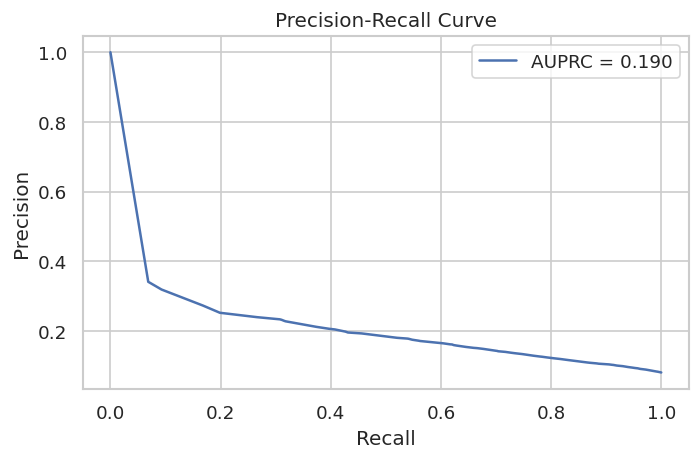

In [27]:
y_prob = model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_prob)
auprc = average_precision_score(y_test, y_prob)
prec, rec, _ = precision_recall_curve(y_test, y_prob)

print(f"ROC-AUC = {roc_auc:.4f}")
print(f"AUPRC   = {auprc:.4f}")

plt.figure(figsize=(6, 4))
plt.plot(rec, prec, label=f"AUPRC = {auprc:.3f}")
plt.xlabel("Recall"); plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend(); plt.grid(True); plt.tight_layout()
plt.savefig("/kaggle/working/eda_outputs/pr_curve.png")
plt.show()

# 6. Confusion matrix at threshold 0.114

In [28]:
thr = 0.114
y_pred = (y_prob >= thr).astype(int)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
fpr = fp / (fp + tn)
fnr = fn / (fn + tp)
prec_th = tp / (tp + fp)
rec_th = tp / (tp + fn)
print(f"Threshold = 0.5 → FPR {fpr:.4f}, FNR {fnr:.4f}, Precision {prec_th:.4f}, Recall {rec_th:.4f}")


Threshold = 0.5 → FPR 0.1518, FNR 0.5732, Precision 0.1980, Recall 0.4268


# 7. Feature importance


Top 20 features by gain:
                                               feature  importance
28                                        EXT_SOURCE_2          13
27                                        EXT_SOURCE_1          12
29                                        EXT_SOURCE_3           7
127                                  LATE_PAYMENT_RATE           6
130                                    AVG_UTILIZATION           4
152               NAME_EDUCATION_TYPE_Higher education           3
7                                        DAYS_EMPLOYED           3
121                                         ACTIVE_POS           3
126                                   AVG_PAYMENT_DIFF           2
107                                    AVG_DAYS_CREDIT           1
111                                AVG_CREDIT_SUM_DEBT           1
155  NAME_EDUCATION_TYPE_Secondary / secondary special           1
151                           NAME_INCOME_TYPE_Working           1
147                         NAME_INC

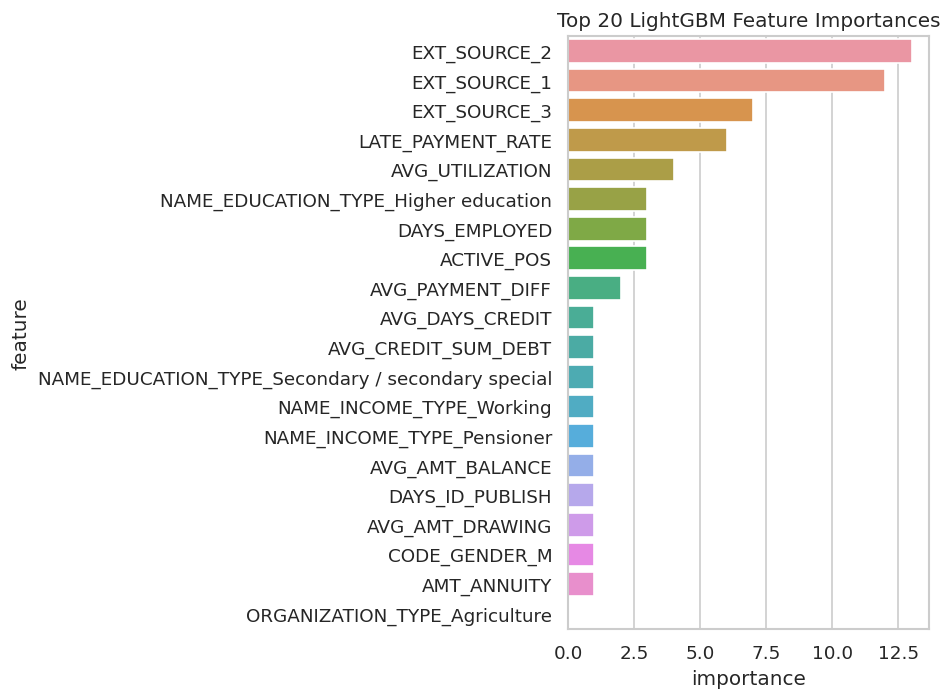

In [29]:
fi = (
    pd.DataFrame({
        "feature": X.columns,
        "importance": model.feature_importances_
    })
    .sort_values("importance", ascending=False)
)
top20 = fi.head(20)
print("\nTop 20 features by gain:")
print(top20)

plt.figure(figsize=(8,6))
sns.barplot(x="importance", y="feature", data=top20, orient="h")
plt.title("Top 20 LightGBM Feature Importances")
plt.tight_layout()
plt.savefig("/kaggle/working/eda_outputs/lgbm_importance.png")
plt.show()


# 8. SHAP explainability

LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
The figure layout has changed to tight



Top 20 features by |SHAP| mean:
                                               feature  shap_abs_mean
29                                        EXT_SOURCE_3       0.062904
28                                        EXT_SOURCE_2       0.056888
27                                        EXT_SOURCE_1       0.024872
127                                  LATE_PAYMENT_RATE       0.014998
126                                   AVG_PAYMENT_DIFF       0.009013
134                                      CODE_GENDER_M       0.005034
152               NAME_EDUCATION_TYPE_Higher education       0.004728
121                                         ACTIVE_POS       0.004151
130                                    AVG_UTILIZATION       0.003008
151                           NAME_INCOME_TYPE_Working       0.002616
7                                        DAYS_EMPLOYED       0.002538
3                                          AMT_ANNUITY       0.001880
155  NAME_EDUCATION_TYPE_Secondary / secondary special   

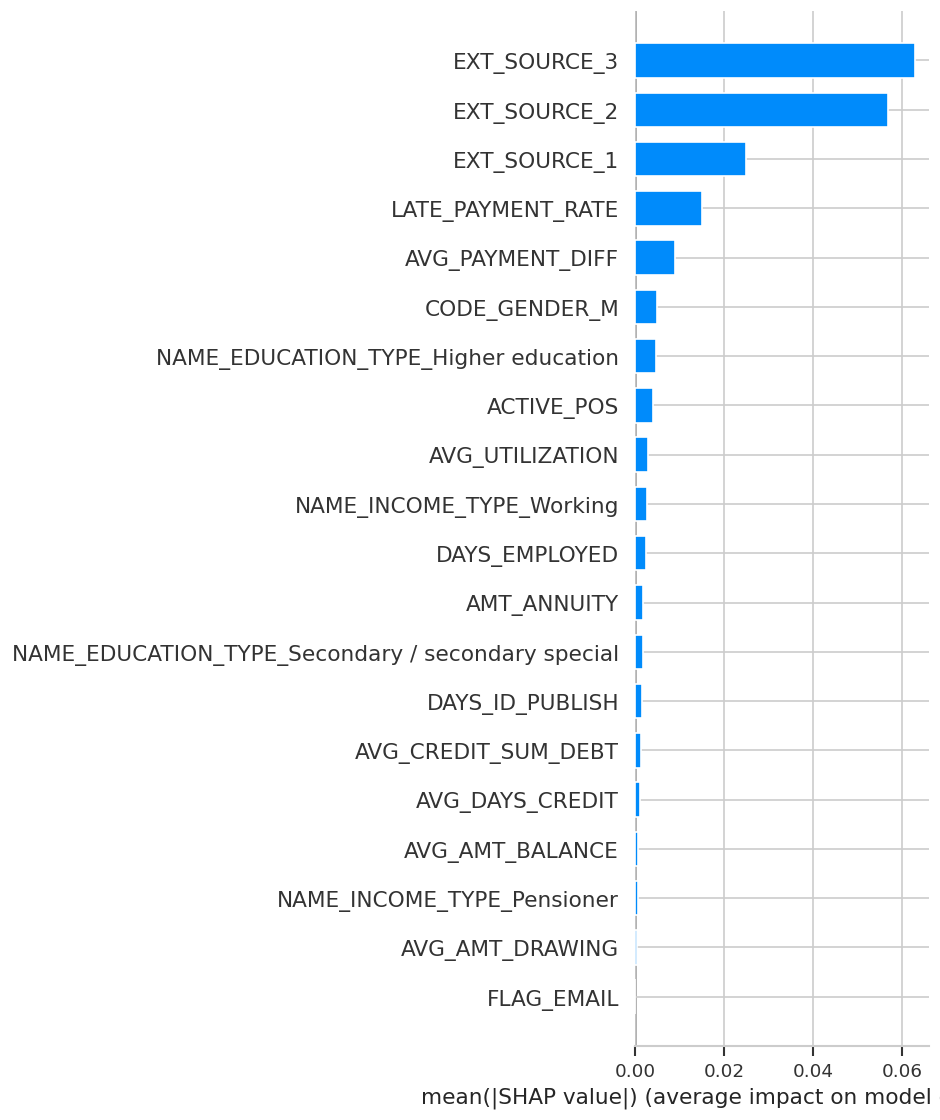

In [30]:
explainer = shap.TreeExplainer(model)
sample = X_train.sample(min(2000, len(X_train)), random_state=RANDOM_STATE)
shap_vals = explainer.shap_values(sample)[1]

# mean(|SHAP|)
shap_df = pd.DataFrame({
    "feature": sample.columns,
    "shap_abs_mean": np.abs(shap_vals).mean(axis=0)
}).sort_values("shap_abs_mean", ascending=False)
shap_top20 = shap_df.head(20)
print("\nTop 20 features by |SHAP| mean:")
print(shap_top20)

plt.figure(figsize=(8,6))
shap.summary_plot(shap_vals, sample, show=False, plot_type="bar")
plt.tight_layout()
plt.savefig("/kaggle/working/eda_outputs/shap_summary_bar.png")
plt.show()

# 9. Save metrics summary

In [31]:
metrics = {
    "roc_auc": roc_auc,
    "auprc": auprc,
    "threshold": thr,
    "fpr": fpr,
    "precision": prec_th,
    "recall": rec_th,
    "train_rows": X_train.shape[0],
    "test_rows": X_test.shape[0],
}
pd.DataFrame([metrics]).to_csv("/kaggle/working/lgbm_metrics_summary.csv", index=False)
top20.to_csv("/kaggle/working/lgbm_top20_importance.csv", index=False)
shap_top20.to_csv("/kaggle/working/lgbm_shap_top20.csv", index=False)
print("✅ Phase 3 complete – metrics and plots saved to /kaggle/working/")

✅ Phase 3 complete – metrics and plots saved to /kaggle/working/


In [32]:
print(pd.read_csv('/kaggle/working/lgbm_shap_top20.csv').head(100))

                                              feature  shap_abs_mean
0                                        EXT_SOURCE_3       0.062904
1                                        EXT_SOURCE_2       0.056888
2                                        EXT_SOURCE_1       0.024872
3                                   LATE_PAYMENT_RATE       0.014998
4                                    AVG_PAYMENT_DIFF       0.009013
5                                       CODE_GENDER_M       0.005034
6                NAME_EDUCATION_TYPE_Higher education       0.004728
7                                          ACTIVE_POS       0.004151
8                                     AVG_UTILIZATION       0.003008
9                            NAME_INCOME_TYPE_Working       0.002616
10                                      DAYS_EMPLOYED       0.002538
11                                        AMT_ANNUITY       0.001880
12  NAME_EDUCATION_TYPE_Secondary / secondary special       0.001797
13                                

# Phase 4

In [33]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
from sklearn.metrics import confusion_matrix

sns.set(style="whitegrid", font_scale=1.1)

# --- 1. Make sure test set has demographic columns ---
# If your test split lost them, pull them from the original dataframe

In [34]:
# --- 1. Build demographic info for fairness audit ---
demo_info = pd.DataFrame(index=X_test.index)

# Try to reconstruct group labels from the one-hot columns
if 'CODE_GENDER_M' in X_test.columns:
    demo_info['CODE_GENDER'] = np.where(X_test['CODE_GENDER_M'] == 1, 'M', 'F')
else:
    demo_info['CODE_GENDER'] = 'Unknown'

if 'FLAG_OWN_CAR_Y' in X_test.columns:
    demo_info['FLAG_OWN_CAR'] = np.where(X_test['FLAG_OWN_CAR_Y'] == 1, 'Y', 'N')
else:
    demo_info['FLAG_OWN_CAR'] = 'Unknown'

# Reconstruct NAME_INCOME_TYPE from its dummy columns
inc_cols = [c for c in X_test.columns if c.startswith('NAME_INCOME_TYPE_')]
if inc_cols:
    demo_info['NAME_INCOME_TYPE'] = X_test[inc_cols].idxmax(axis=1).str.replace('NAME_INCOME_TYPE_', '')
else:
    demo_info['NAME_INCOME_TYPE'] = 'Unknown'

# Attach actuals and predictions
demo_info['TARGET'] = y_test
demo_info['PRED_PROB'] = y_prob
demo_info['PRED_FLAG'] = (demo_info['PRED_PROB'] >= 0.114).astype(int)

demo_cols = ['CODE_GENDER', 'FLAG_OWN_CAR', 'NAME_INCOME_TYPE']


# --- 2. Helper to compute group-level FPRs ---

In [35]:
def group_fpr(df, group_col):
    """Compute False Positive Rate per category in group_col."""
    rows = []
    for cat, subset in df.groupby(group_col):
        tn, fp, fn, tp = confusion_matrix(subset["TARGET"], subset["PRED_FLAG"]).ravel()
        fpr = fp / (fp + tn) if (fp + tn) > 0 else np.nan
        fnr = fn / (fn + tp) if (fn + tp) > 0 else np.nan
        rows.append({"Group": group_col, "Category": cat,
                     "Count": len(subset),
                     "FPR": fpr, "FNR": fnr})
    return pd.DataFrame(rows)


# --- 3. Compute fairness tables ---

In [36]:
fairness_frames = []
for col in demo_cols:
    fairness_frames.append(group_fpr(demo_info, col))
fairness_df = pd.concat(fairness_frames, ignore_index=True)


# --- 4. Display results ---

=== Group-wise False Positive / False Negative Rates ===
               Group              Category  Count       FPR       FNR
1        CODE_GENDER                     M  20940  0.175482  0.557069
0        CODE_GENDER                     F  40563  0.140006  0.585331
2       FLAG_OWN_CAR                     N  40511  0.156691  0.563689
3       FLAG_OWN_CAR                     Y  20992  0.142535  0.595318
10  NAME_INCOME_TYPE               Working  31731  0.193991  0.523181
8   NAME_INCOME_TYPE               Student      7  0.142857       NaN
7   NAME_INCOME_TYPE         State servant   4185  0.121717  0.617778
4   NAME_INCOME_TYPE  Commercial associate  14345  0.113028  0.634387
6   NAME_INCOME_TYPE             Pensioner  11228  0.098011  0.706645
9   NAME_INCOME_TYPE            Unemployed      5  0.000000  0.666667
5   NAME_INCOME_TYPE       Maternity leave      2       NaN  1.000000


invalid value encountered in greater
invalid value encountered in less
invalid value encountered in greater


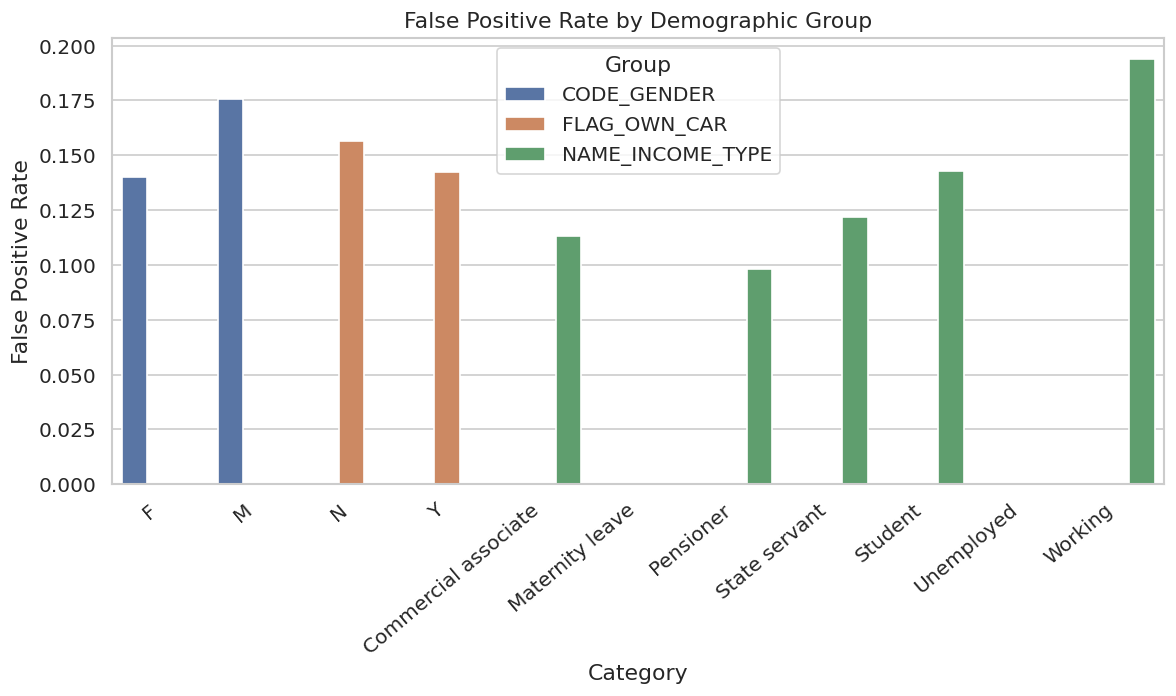

In [37]:
print("=== Group-wise False Positive / False Negative Rates ===")
print(fairness_df.sort_values(["Group","FPR"], ascending=[True,False]))

plt.figure(figsize=(10,6))
sns.barplot(data=fairness_df, x="Category", y="FPR", hue="Group")
plt.title("False Positive Rate by Demographic Group")
plt.ylabel("False Positive Rate")
plt.xticks(rotation=40, ha="right")
plt.tight_layout()
plt.savefig("/kaggle/working/fairness_FPR_by_group.png")
plt.show()

# --- 5. Quick summary statistics ---

In [38]:
summary = fairness_df.groupby("Group")["FPR"].agg(["mean","std","min","max"]).reset_index()
print("\n=== FPR Summary by Group ===")
print(summary)



=== FPR Summary by Group ===
              Group      mean       std       min       max
0       CODE_GENDER  0.157744  0.025086  0.140006  0.175482
1      FLAG_OWN_CAR  0.149613  0.010010  0.142535  0.156691
2  NAME_INCOME_TYPE  0.111601  0.064045  0.000000  0.193991



# Save outputs

In [39]:
fairness_df.to_csv("/kaggle/working/fairness_group_fprs.csv", index=False)
summary.to_csv("/kaggle/working/fairness_fpr_summary.csv", index=False)
print("\n✅ Phase 4 complete – results saved to /kaggle/working/")


✅ Phase 4 complete – results saved to /kaggle/working/
